# MULTICLASS CLASSIFICATION CODEBOOK


In [2]:
# Refresh all variables from store
%store -r

#### Parameters


In [4]:
TOP_N_FEATURES_SELECTED = 150;
dataset_location = 'C:/Users/DELL PC/Desktop/Major/Ache wale/Feature selection datasets/452,279,cat&int&real,classification - Arrhythmia 1998/dataset.csv'

In [5]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
import matplotlib as plt

In [6]:
dataset = pd.read_csv(dataset_location,header=None)

In [7]:
dataset.shape

(452, 280)

In [11]:
dataset.loc[:,13];

Attributes in X (indepedent variables)

In [12]:
X = dataset.iloc[:,:279].values
X

array([[  75. ,    0. ,  190. , ...,    2.9,   23.3,   49.4],
       [  56. ,    1. ,  165. , ...,    2.1,   20.4,   38.8],
       [  54. ,    0. ,  172. , ...,    3.4,   12.3,   49. ],
       ..., 
       [  36. ,    0. ,  166. , ...,    1. ,  -44.2,  -33.2],
       [  32. ,    1. ,  155. , ...,    2.4,   25. ,   46.6],
       [  78. ,    1. ,  160. , ...,    1.6,   21.3,   32.8]])

Targets in Y (dependent variables)

In [13]:
Y = dataset.iloc[:,279].values
Y;

### DATASET Preprocessing

In [14]:
# Replacing missing values with median

from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='median', axis=0)
imputer = imputer.fit(X[:,:])
X[:,:] = imputer.transform(X[:,:])
X[:,13];

In [15]:
# Scaling all the features of X

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X;

In [16]:
# Stratified 5 Fold Cross validation on 452 samples of dataset

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,random_state=1)
skf.get_n_splits(X, Y)

5

for train_index, test_index in skf.split(X, Y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

In [17]:
def meanOfLists(A):
    count = 0
    s = 0
    for i in A:
        s += i
        count += 1
        
    return s/count;

## Creating Classifier Object List after Parameter Tuning using 5 Fold CV

In [18]:
%%time

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
from sklearn.semi_supervised import LabelPropagation,LabelSpreading
from sklearn.naive_bayes import *
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,SGDClassifier,PassiveAggressiveClassifier
from sklearn.neighbors import NearestCentroid

from sklearn.metrics import accuracy_score

# list containing object of all classifiers
classifier_list = []

# list of lists containing all results
RESULTS = []

# list containing classifier accuracy without feature selection
nofeatures = []

Wall time: 361 ms


In [19]:
ensemble_voting = []

### Stochastic Gradient Descent

In [20]:
from sklearn.grid_search import RandomizedSearchCV

In [21]:
def float_range(start,stop,step):
    l = []
    l.append(start);
    
    while(start<=stop):
        start = start + step
        l.append(start)
        
    return l;

In [22]:
%%time

sgd = SGDClassifier()

sgd_param_grid = {
                    'l1_ratio':float_range(0.01,1.0,0.05),
                    'loss':['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
                    'penalty':['l2', 'l1', 'elasticnet'],
                    'n_iter':[10,100,500, 1000],
                    'learning_rate':['constant','optimal','invscaling'],
                    'eta0':[0.001]
                 }

randcvSGD = RandomizedSearchCV(sgd, sgd_param_grid, cv=5, n_iter=10, scoring='accuracy',verbose=3)
randcvSGD.fit(X, Y)

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] penalty=l2, n_iter=500, loss=log, learning_rate=invscaling, l1_ratio=0.9100000000000004, eta0=0.001 
[CV]  penalty=l2, n_iter=500, loss=log, learning_rate=invscaling, l1_ratio=0.9100000000000004, eta0=0.001, score=0.666667 -   2.4s
[CV] penalty=l2, n_iter=500, loss=log, learning_rate=invscaling, l1_ratio=0.9100000000000004, eta0=0.001 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV]  penalty=l2, n_iter=500, loss=log, learning_rate=invscaling, l1_ratio=0.9100000000000004, eta0=0.001, score=0.634409 -   1.8s
[CV] penalty=l2, n_iter=500, loss=log, learning_rate=invscaling, l1_ratio=0.9100000000000004, eta0=0.001 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


[CV]  penalty=l2, n_iter=500, loss=log, learning_rate=invscaling, l1_ratio=0.9100000000000004, eta0=0.001, score=0.703297 -   1.7s
[CV] penalty=l2, n_iter=500, loss=log, learning_rate=invscaling, l1_ratio=0.9100000000000004, eta0=0.001 
[CV]  penalty=l2, n_iter=500, loss=log, learning_rate=invscaling, l1_ratio=0.9100000000000004, eta0=0.001, score=0.651685 -   1.8s
[CV] penalty=l2, n_iter=500, loss=log, learning_rate=invscaling, l1_ratio=0.9100000000000004, eta0=0.001 
[CV]  penalty=l2, n_iter=500, loss=log, learning_rate=invscaling, l1_ratio=0.9100000000000004, eta0=0.001, score=0.709302 -   2.0s
[CV] penalty=elasticnet, n_iter=500, loss=log, learning_rate=invscaling, l1_ratio=0.41, eta0=0.001 
[CV]  penalty=elasticnet, n_iter=500, loss=log, learning_rate=invscaling, l1_ratio=0.41, eta0=0.001, score=0.655914 -   5.3s
[CV] penalty=elasticnet, n_iter=500, loss=log, learning_rate=invscaling, l1_ratio=0.41, eta0=0.001 
[CV]  penalty=elasticnet, n_iter=500, loss=log, learning_rate=invscali

[CV]  penalty=l2, n_iter=500, loss=perceptron, learning_rate=invscaling, l1_ratio=0.9100000000000004, eta0=0.001, score=0.430108 -   0.8s
[CV] penalty=l2, n_iter=500, loss=perceptron, learning_rate=invscaling, l1_ratio=0.9100000000000004, eta0=0.001 
[CV]  penalty=l2, n_iter=500, loss=perceptron, learning_rate=invscaling, l1_ratio=0.9100000000000004, eta0=0.001, score=0.560440 -   0.8s
[CV] penalty=l2, n_iter=500, loss=perceptron, learning_rate=invscaling, l1_ratio=0.9100000000000004, eta0=0.001 
[CV]  penalty=l2, n_iter=500, loss=perceptron, learning_rate=invscaling, l1_ratio=0.9100000000000004, eta0=0.001, score=0.516854 -   0.8s
[CV] penalty=l2, n_iter=500, loss=perceptron, learning_rate=invscaling, l1_ratio=0.9100000000000004, eta0=0.001 
[CV]  penalty=l2, n_iter=500, loss=perceptron, learning_rate=invscaling, l1_ratio=0.9100000000000004, eta0=0.001, score=0.441860 -   0.8s
[CV] penalty=elasticnet, n_iter=500, loss=hinge, learning_rate=optimal, l1_ratio=0.6600000000000001, eta0=0.0

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.0min finished


Wall time: 3min


print(randcvSGD.best_score_)
print(randcvSGD.best_params_)

randcvSGD.grid_scores_;

%%time

SGD_Classifier = SGDClassifier(penalty = 'l2', n_iter= 500, loss='squared_hinge', learning_rate='invscaling', l1_ratio= 0.26, eta0= 0.001)
classifier_list.append(SGD_Classifier)

Y_preds = []
accuracies = []

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_train, X_test = X[train_indexes], X[test_indexes]
    Y_train, Y_test = Y[train_indexes], Y[test_indexes]
    
    SGD_Classifier.fit(X_train,Y_train)
    Y_PRED = SGD_Classifier.predict(X_test)
    Y_preds.append(Y_PRED)
    
    acc = accuracy_score(Y_test,Y_PRED)
    accuracies.append(acc)
    print("Accuracy = ",acc)
    
ensemble_voting.append(Y_preds)

meanAcc = meanOfLists(accuracies)

print("Mean Accuracy = ",meanAcc)
nofeatures.append(meanAcc)

### Passive aggressive classifier

In [ ]:
%%time

pa = PassiveAggressiveClassifier()

pa_param_grid = {
                    'C':float_range(0.01,3.0,0.5),
                    'loss':['hinge', 'squared_hinge'],
                    'n_iter':[1,2,3,4,5,6,7],
                    'warm_start':['True','False']
                 }

randcvPA = RandomizedSearchCV(pa, pa_param_grid, cv=5, n_iter=196, scoring='accuracy',verbose=3)
randcvPA.fit(X, Y)

print(randcvPA.best_score_)
print(randcvPA.best_params_)

randcvPA.grid_scores_;

In [18]:
%%time

pa_classifier = PassiveAggressiveClassifier(n_iter=2,C=0.01)
classifier_list.append(pa_classifier)

Y_preds = []
accuracies = []

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_train, X_test = X[train_indexes], X[test_indexes]
    Y_train, Y_test = Y[train_indexes], Y[test_indexes]
    
    pa_classifier.fit(X_train,Y_train)
    Y_PRED = pa_classifier.predict(X_test)
    Y_preds.append(Y_PRED)
    
    acc = accuracy_score(Y_test,Y_PRED)
    accuracies.append(acc)
    print("Accuracy = ",acc)
    
ensemble_voting.append(Y_preds)

meanAcc = meanOfLists(accuracies)

print("Mean Accuracy = ",meanAcc)
nofeatures.append(meanAcc)

Accuracy =  0.655913978495
Accuracy =  0.602150537634
Accuracy =  0.703296703297
Accuracy =  0.61797752809
Accuracy =  0.732558139535
Mean Accuracy =  0.66237937741
Wall time: 91.1 ms


C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


### Logistic Regression

%%time

lr = LogisticRegression()

lr_param_grid = {
                    'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
                    'penalty':['l2'],
                    'solver' : ['newton-cg', 'lbfgs', 'sag']
                 }

randcvlr = RandomizedSearchCV(lr, lr_param_grid, cv=5, n_iter=21, scoring='accuracy',verbose=3)
randcvlr.fit(X, Y)

print(randcvlr.best_score_)
print(randcvlr.best_params_)

print(randcvlr.best_score_)
print(randcvlr.best_params_)

In [19]:
%%time

classifier = LogisticRegression(C=0.01)
classifier_list.append(classifier)

Y_preds = []
accuracies = []

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_train, X_test = X[train_indexes], X[test_indexes]
    Y_train, Y_test = Y[train_indexes], Y[test_indexes]
    
    classifier.fit(X_train,Y_train)
    Y_PRED = classifier.predict(X_test)
    Y_preds.append(Y_PRED)
    
    acc = accuracy_score(Y_test,Y_PRED)
    accuracies.append(acc)
    print("Accuracy = ",acc)
    
ensemble_voting.append(Y_preds)

meanAcc = meanOfLists(accuracies)

print("Mean Accuracy = ",meanAcc)
nofeatures.append(meanAcc)

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy =  0.698924731183
Accuracy =  0.645161290323
Accuracy =  0.747252747253
Accuracy =  0.674157303371
Accuracy =  0.732558139535
Mean Accuracy =  0.699610842333
Wall time: 786 ms


### Label Propoagation

%%time

lp = LabelPropagation()

lp_param_grid = {
                    'kernel':['knn', 'rbf'],
                    'gamma':list(range(1,100,10)),
                    'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
                    'max_iter':[1000],
                    'n_neighbors' : list(range(1,51))
                 }

randcvlp = RandomizedSearchCV(lp, lp_param_grid, cv=5, n_iter=500, scoring='accuracy',verbose=3)
randcvlp.fit(X, Y)

print(randcvlp.best_score_)
print(randcvlp.best_params_)

In [20]:
%%time

classifier = LabelPropagation(n_neighbors=1,max_iter=1000,kernel='knn')
classifier_list.append(classifier)

Y_preds = []
accuracies = []

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_train, X_test = X[train_indexes], X[test_indexes]
    Y_train, Y_test = Y[train_indexes], Y[test_indexes]
    
    classifier.fit(X_train,Y_train)
    Y_PRED = classifier.predict(X_test)
    Y_preds.append(Y_PRED)
    
    acc = accuracy_score(Y_test,Y_PRED)
    accuracies.append(acc)
    print("Accuracy = ",acc)
    
ensemble_voting.append(Y_preds)

meanAcc = meanOfLists(accuracies)

print("Mean Accuracy = ",meanAcc)
nofeatures.append(meanAcc)

Accuracy =  0.591397849462
Accuracy =  0.548387096774


C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy =  0.571428571429
Accuracy =  0.505617977528
Accuracy =  0.639534883721
Mean Accuracy =  0.571273275783
Wall time: 316 ms


### BNB

In [21]:
%%time

classifier = BernoulliNB()
classifier_list.append(classifier)

Y_preds = []
accuracies = []

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_train, X_test = X[train_indexes], X[test_indexes]
    Y_train, Y_test = Y[train_indexes], Y[test_indexes]
    
    classifier.fit(X_train,Y_train)
    Y_PRED = classifier.predict(X_test)
    Y_preds.append(Y_PRED)
    
    acc = accuracy_score(Y_test,Y_PRED)
    accuracies.append(acc)
    print("Accuracy = ",acc)
    
ensemble_voting.append(Y_preds)

meanAcc = meanOfLists(accuracies)

print("Mean Accuracy = ",meanAcc)
nofeatures.append(meanAcc)

Accuracy =  0.655913978495
Accuracy =  0.548387096774
Accuracy =  0.67032967033
Accuracy =  0.573033707865
Accuracy =  0.686046511628
Mean Accuracy =  0.626742193018
Wall time: 37 ms


C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


### Linear SVC

%%time

lsvc = LinearSVC()

param_grid = {
                'C':float_range(0.0001,0.1,0.0005)
             }

randcvlsvc = RandomizedSearchCV(lsvc, param_grid, cv=5, n_iter=50, scoring='accuracy',verbose=3)
randcvlsvc.fit(X, Y)

print(randcvlsvc.best_score_)
print(randcvlsvc.best_params_)

In [22]:
%%time

classifier = LinearSVC(C=0.007)
classifier_list.append(classifier)

Y_preds = []
accuracies = []

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_train, X_test = X[train_indexes], X[test_indexes]
    Y_train, Y_test = Y[train_indexes], Y[test_indexes]
    
    classifier.fit(X_train,Y_train)
    Y_PRED = classifier.predict(X_test)
    Y_preds.append(Y_PRED)
    
    acc = accuracy_score(Y_test,Y_PRED)
    accuracies.append(acc)
    print("Accuracy = ",acc)
    
ensemble_voting.append(Y_preds)

meanAcc = meanOfLists(accuracies)

print("Mean Accuracy = ",meanAcc)
nofeatures.append(meanAcc)

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy =  0.688172043011
Accuracy =  0.634408602151
Accuracy =  0.736263736264
Accuracy =  0.719101123596
Accuracy =  0.755813953488
Mean Accuracy =  0.706751891702
Wall time: 1.01 s


### KNC

%%time

knn = KNeighborsClassifier()

param_grid = {
                'n_neighbors':list(range(1,50)),
                'weights':['uniform','distance']
             }

randcv = RandomizedSearchCV(knn, param_grid, cv=5, n_iter=50, scoring='accuracy',verbose=3)
randcv.fit(X, Y)

print(randcv.best_score_)
print(randcv.best_params_)

In [23]:
%%time

classifier = KNeighborsClassifier(n_neighbors=7,weights='distance')
classifier_list.append(classifier)

Y_preds = []
accuracies = []

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_train, X_test = X[train_indexes], X[test_indexes]
    Y_train, Y_test = Y[train_indexes], Y[test_indexes]
    
    classifier.fit(X_train,Y_train)
    Y_PRED = classifier.predict(X_test)
    Y_preds.append(Y_PRED)
    
    acc = accuracy_score(Y_test,Y_PRED)
    accuracies.append(acc)
    print("Accuracy = ",acc)
    
ensemble_voting.append(Y_preds)

meanAcc = meanOfLists(accuracies)

print("Mean Accuracy = ",meanAcc)
nofeatures.append(meanAcc)

Accuracy =  0.602150537634
Accuracy =  0.559139784946
Accuracy =  0.593406593407
Accuracy =  0.61797752809
Accuracy =  0.627906976744
Mean Accuracy =  0.600116284164
Wall time: 116 ms


C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


### MLPC

%%time

clf = MLPClassifier()

param_grid = {
                
             }

randcv = RandomizedSearchCV(clf, param_grid, cv=5, n_iter=0, scoring='accuracy',verbose=3)
randcv.fit(X, Y)

print(randcv.best_score_)
print(randcv.best_params_)

In [24]:
%%time

classifier = MLPClassifier()
classifier_list.append(classifier)

Y_preds = []
accuracies = []

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_train, X_test = X[train_indexes], X[test_indexes]
    Y_train, Y_test = Y[train_indexes], Y[test_indexes]
    
    classifier.fit(X_train,Y_train)
    Y_PRED = classifier.predict(X_test)
    Y_preds.append(Y_PRED)
    
    acc = accuracy_score(Y_test,Y_PRED)
    accuracies.append(acc)
    print("Accuracy = ",acc)
    
ensemble_voting.append(Y_preds)

meanAcc = meanOfLists(accuracies)

print("Mean Accuracy = ",meanAcc)
nofeatures.append(meanAcc)

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Accuracy =  0.655913978495
Accuracy =  0.623655913978
Accuracy =  0.758241758242
Accuracy =  0.61797752809
Accuracy =  0.686046511628
Mean Accuracy =  0.668367138087
Wall time: 5.17 s


### SVC

%%time

clf = SVC()

param_grid = {
                #'C':float_range(0.0001,0.1,0.0),
                'C':float_range(1.5,3.5,0.1),
                'kernel': ['sigmoid' ],
                'degree':list(range(1,11))
             }

randcv = RandomizedSearchCV(clf, param_grid, cv=5, n_iter=50, scoring='accuracy',verbose=3)
randcv.fit(X, Y)

print(randcv.best_score_)
print(randcv.best_params_)

In [25]:
%%time

classifier = SVC(kernel = 'sigmoid',C=1.8)
classifier_list.append(classifier)

Y_preds = []
accuracies = []

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_train, X_test = X[train_indexes], X[test_indexes]
    Y_train, Y_test = Y[train_indexes], Y[test_indexes]
    
    classifier.fit(X_train,Y_train)
    Y_PRED = classifier.predict(X_test)
    Y_preds.append(Y_PRED)
    
    acc = accuracy_score(Y_test,Y_PRED)
    accuracies.append(acc)
    print("Accuracy = ",acc)
    
ensemble_voting.append(Y_preds)

meanAcc = meanOfLists(accuracies)

print("Mean Accuracy = ",meanAcc)
nofeatures.append(meanAcc)

Accuracy =  0.655913978495
Accuracy =  0.666666666667


C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy =  0.736263736264
Accuracy =  0.752808988764
Accuracy =  0.744186046512
Mean Accuracy =  0.71116788334
Wall time: 344 ms


In [26]:
%%time

classifier = DecisionTreeClassifier()
classifier_list.append(classifier)

Y_preds = []
accuracies = []

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_train, X_test = X[train_indexes], X[test_indexes]
    Y_train, Y_test = Y[train_indexes], Y[test_indexes]
    
    classifier.fit(X_train,Y_train)
    Y_PRED = classifier.predict(X_test)
    Y_preds.append(Y_PRED)
    
    acc = accuracy_score(Y_test,Y_PRED)
    accuracies.append(acc)
    print("Accuracy = ",acc)
    
ensemble_voting.append(Y_preds)

meanAcc = meanOfLists(accuracies)

print("Mean Accuracy = ",meanAcc)
nofeatures.append(meanAcc)

Accuracy =  0.666666666667
Accuracy =  0.655913978495
Accuracy =  0.659340659341


C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy =  0.595505617978
Accuracy =  0.616279069767
Mean Accuracy =  0.638741198449
Wall time: 252 ms


In [27]:
%%time

classifier = RandomForestClassifier()
classifier_list.append(classifier)

Y_preds = []
accuracies = []

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_train, X_test = X[train_indexes], X[test_indexes]
    Y_train, Y_test = Y[train_indexes], Y[test_indexes]
    
    classifier.fit(X_train,Y_train)
    Y_PRED = classifier.predict(X_test)
    Y_preds.append(Y_PRED)
    
    acc = accuracy_score(Y_test,Y_PRED)
    accuracies.append(acc)
    print("Accuracy = ",acc)
    
ensemble_voting.append(Y_preds)

meanAcc = meanOfLists(accuracies)

print("Mean Accuracy = ",meanAcc)
nofeatures.append(meanAcc)

Accuracy =  0.709677419355
Accuracy =  0.655913978495
Accuracy =  0.681318681319
Accuracy =  0.741573033708
Accuracy =  0.732558139535
Mean Accuracy =  0.704208250482
Wall time: 167 ms


C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [28]:
%%time

classifier = GradientBoostingClassifier()
classifier_list.append(classifier)

Y_preds = []
accuracies = []

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_train, X_test = X[train_indexes], X[test_indexes]
    Y_train, Y_test = Y[train_indexes], Y[test_indexes]
    
    classifier.fit(X_train,Y_train)
    Y_PRED = classifier.predict(X_test)
    Y_preds.append(Y_PRED)
    
    acc = accuracy_score(Y_test,Y_PRED)
    accuracies.append(acc)
    print("Accuracy = ",acc)
    
ensemble_voting.append(Y_preds)

meanAcc = meanOfLists(accuracies)

print("Mean Accuracy = ",meanAcc)
nofeatures.append(meanAcc)

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy =  0.709677419355
Accuracy =  0.677419354839
Accuracy =  0.747252747253
Accuracy =  0.797752808989
Accuracy =  0.674418604651
Mean Accuracy =  0.721304187017
Wall time: 20.3 s


In [3]:
# should be 12
len(ensemble_voting)

205

In [30]:
RESULTS = []
RESULTS.append(nofeatures)
RESULTS

[[0.69099255305245,
  0.66237937741010133,
  0.69961084233275872,
  0.57127327578283005,
  0.62674219301831247,
  0.70675189170178088,
  0.60011628416426244,
  0.66836713808653414,
  0.71116788334013981,
  0.63874119844938393,
  0.7042082504821785,
  0.72130418701724452]]

In [31]:
%store classifier_list
%store nofeatures
%store RESULTS

Stored 'classifier_list' (list)
Stored 'nofeatures' (list)
Stored 'RESULTS' (list)


In [1]:
classifier_list[10]

NameError: name 'classifier_list' is not defined

# Feature Selection with Filter Approaches

In [33]:
%%time
# using mRMR feature selection

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from skfeature.function.information_theoretical_based import CMIM,DISR,MIFS,MIM,JMI,ICAP,MRMR,CIFE
from skfeature.function.similarity_based import fisher_score,reliefF,trace_ratio
from skfeature.utility.sparse_learning import *
from skfeature.function.sparse_learning_based import ll_l21,ls_l21,RFS
from skfeature.function.statistical_based import f_score,gini_index
from boruta import BorutaPy

# obtain the index of each feature on the training set

filterFeatureSelectors = []

# adding all indexes as a list as first element for checking without feature selection
all_indexes = list(range(0,279))

Wall time: 21 ms


## Feature Selectors

In [34]:
%%time

selected_indexes = []

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_TRAIN, X_TEST = X[train_indexes], X[test_indexes]
    Y_TRAIN, Y_TEST = Y[train_indexes], Y[test_indexes]

    mrmrIndexes,_,_ = MRMR.mrmr(X_TRAIN, Y_TRAIN, n_selected_features=TOP_N_FEATURES_SELECTED)
    selected_indexes.append(mrmrIndexes)
    
filterFeatureSelectors.append(selected_indexes)

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Wall time: 4min 21s


In [35]:
%%time

selected_indexes = []

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_TRAIN, X_TEST = X[train_indexes], X[test_indexes]
    Y_TRAIN, Y_TEST = Y[train_indexes], Y[test_indexes]
    
    cifeIndexes,_,_ = CIFE.cife(X_TRAIN, Y_TRAIN, n_selected_features=TOP_N_FEATURES_SELECTED)
    selected_indexes.append(cifeIndexes)
    
    
filterFeatureSelectors.append(selected_indexes)

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Wall time: 4min 22s


In [36]:
%%time
selected_indexes = []

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_TRAIN, X_TEST = X[train_indexes], X[test_indexes]
    Y_TRAIN, Y_TEST = Y[train_indexes], Y[test_indexes]
    
    cmimIndexes,_,_ = CMIM.cmim(X_TRAIN, Y_TRAIN, n_selected_features=TOP_N_FEATURES_SELECTED)
    selected_indexes.append(cmimIndexes)
    
filterFeatureSelectors.append(selected_indexes)

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Wall time: 4min 34s


In [37]:
%%time
selected_indexes = []

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_TRAIN, X_TEST = X[train_indexes], X[test_indexes]
    Y_TRAIN, Y_TEST = Y[train_indexes], Y[test_indexes]
    
    disrIndexes,_,_ = DISR.disr(X_TRAIN, Y_TRAIN, n_selected_features=TOP_N_FEATURES_SELECTED)
    selected_indexes.append(disrIndexes)
    
filterFeatureSelectors.append(selected_indexes)

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Wall time: 12min 56s


In [38]:
%%time
selected_indexes = []

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_TRAIN, X_TEST = X[train_indexes], X[test_indexes]
    Y_TRAIN, Y_TEST = Y[train_indexes], Y[test_indexes]
   
    icapIndexes,_,_ = ICAP.icap(X_TRAIN, Y_TRAIN, n_selected_features=TOP_N_FEATURES_SELECTED)
    selected_indexes.append(icapIndexes)
    
filterFeatureSelectors.append(selected_indexes)

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Wall time: 4min 37s


In [39]:
%%time
selected_indexes = []

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_TRAIN, X_TEST = X[train_indexes], X[test_indexes]
    Y_TRAIN, Y_TEST = Y[train_indexes], Y[test_indexes]
    
    jmiIndexes,_,_ = JMI.jmi(X_TRAIN, Y_TRAIN, n_selected_features=TOP_N_FEATURES_SELECTED)
    selected_indexes.append(jmiIndexes)
    
filterFeatureSelectors.append(selected_indexes)

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Wall time: 4min 34s


In [40]:
%%time
selected_indexes = []

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_TRAIN, X_TEST = X[train_indexes], X[test_indexes]
    Y_TRAIN, Y_TEST = Y[train_indexes], Y[test_indexes]
    
    mifsIndexes,_,_ = MIFS.mifs(X_TRAIN, Y_TRAIN, n_selected_features=TOP_N_FEATURES_SELECTED)
    selected_indexes.append(mifsIndexes)
    
filterFeatureSelectors.append(selected_indexes)

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Wall time: 4min 4s


In [41]:
%%time
selected_indexes = []

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_TRAIN, X_TEST = X[train_indexes], X[test_indexes]
    Y_TRAIN, Y_TEST = Y[train_indexes], Y[test_indexes]
    
    mimIndexes,_,_ = MIM.mim(X_TRAIN, Y_TRAIN, n_selected_features=TOP_N_FEATURES_SELECTED)
    selected_indexes.append(mimIndexes)
    
filterFeatureSelectors.append(selected_indexes)

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Wall time: 4min 34s


In [42]:
%%time
Top_n_fisher_indexes = []

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_train, X_test = X[train_indexes], X[test_indexes]
    Y_train, Y_test = Y[train_indexes], Y[test_indexes]
    
    score = fisher_score.fisher_score(X_train, Y_train)
    fisher_indexes = fisher_score.feature_ranking(score)
    Top_n_fisher_indexes.append( fisher_indexes[0:TOP_N_FEATURES_SELECTED] )
    
filterFeatureSelectors.append(Top_n_fisher_indexes)

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Wall time: 296 ms


In [43]:
%%time

Top_n_reliefF_indexes = []

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_TRAIN, X_TEST = X[train_indexes], X[test_indexes]
    Y_TRAIN, Y_TEST = Y[train_indexes], Y[test_indexes]

    score = reliefF.reliefF(X_TRAIN, Y_TRAIN)
    reliefF_indexes = reliefF.feature_ranking(score)
    Top_n_reliefF_indexes.append(reliefF_indexes[0:TOP_N_FEATURES_SELECTED])
    
filterFeatureSelectors.append(Top_n_reliefF_indexes)

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Wall time: 2.91 s


In [44]:
%%time
traceRatioIndexes=[]

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_TRAIN, X_TEST = X[train_indexes], X[test_indexes]
    Y_TRAIN, Y_TEST = Y[train_indexes], Y[test_indexes]
    trace_ratio_indexes, feature_score, subset_score = trace_ratio.trace_ratio(X_TRAIN, Y_TRAIN, n_selected_features=TOP_N_FEATURES_SELECTED)
    traceRatioIndexes.append(trace_ratio_indexes)
    
filterFeatureSelectors.append(traceRatioIndexes)

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\DELL PC\Anaconda3\lib\site-packages\skfeature\function\similarity_based\trace_ratio.py:85: RuntimeWarning: divide by zero encountered in true_divide
  fs_idx = np.argsort(np.divide(s_between, s_within), 0)[::-1]


Wall time: 239 ms


In [45]:
%%time

ll_l21_indexes = []

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_TRAIN, X_TEST = X[train_indexes], X[test_indexes]
    Y_TRAIN, Y_TEST = Y[train_indexes], Y[test_indexes]
        
    # constructinf Y(no of samples x no of classes) matrix
    ll_Y = construct_label_matrix_pan(Y_TRAIN)

    Weight, obj, value_gamma = ll_l21.proximal_gradient_descent(X_TRAIN, ll_Y, 0.1, verbose=False)

    # sort the feature scores in an ascending order according to the feature scores
    idx = feature_ranking(Weight)

    ll_l21_indexes.append(idx[0:TOP_N_FEATURES_SELECTED])
    
filterFeatureSelectors.append(ll_l21_indexes)

Wall time: 42 ms


C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [46]:
%%time

ls_l21_indexes = []

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_TRAIN, X_TEST = X[train_indexes], X[test_indexes]
    Y_TRAIN, Y_TEST = Y[train_indexes], Y[test_indexes]

    # constructinf Y(no of samples x no of classes) matrix
    ls_Y = construct_label_matrix_pan(Y_TRAIN)

    Weight, obj, value_gamma = ls_l21.proximal_gradient_descent(X_TRAIN, ls_Y, 0.1, verbose=False)

    # sort the feature scores in an ascending order according to the feature scores
    idx = feature_ranking(Weight)

    ls_l21_indexes.append(idx[0:TOP_N_FEATURES_SELECTED])
    
filterFeatureSelectors.append(ls_l21_indexes)

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Wall time: 15.8 s


In [47]:
for i in range(13):
    print(len(filterFeatureSelectors[i]))

5
5
5
5
5
5
5
5
5
5
5
5
5


In [48]:
%%time
RFS_indexes = []

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_TRAIN, X_TEST = X[train_indexes], X[test_indexes]
    Y_TRAIN, Y_TEST = Y[train_indexes], Y[test_indexes]

    # constructinf Y(no of samples x no of classes) matrix
    RFS_Y = construct_label_matrix_pan(Y_TRAIN)

    Weight = RFS.rfs(X_TRAIN, RFS_Y, gamma=0.1)

    # sort the feature scores in an ascending order according to the feature scores
    idx = feature_ranking(Weight)

    RFS_indexes.append(idx[0:TOP_N_FEATURES_SELECTED])
    
filterFeatureSelectors.append(RFS_indexes)

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Wall time: 16 s


## Statistical Based Feature Selectors

In [49]:
%%time

selected_indexes = []

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_TRAIN, X_TEST = X[train_indexes], X[test_indexes]
    Y_TRAIN, Y_TEST = Y[train_indexes], Y[test_indexes]
    
    score = gini_index.gini_index(X_TRAIN, Y_TRAIN)

    # rank features in descending order according to score
    idx = gini_index.feature_ranking(score)

    selected_indexes.append(idx[0:TOP_N_FEATURES_SELECTED])
    
filterFeatureSelectors.append(selected_indexes)

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Wall time: 14.5 s


In [50]:
%%time

selected_indexes = []

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_TRAIN, X_TEST = X[train_indexes], X[test_indexes]
    Y_TRAIN, Y_TEST = Y[train_indexes], Y[test_indexes]
    
    score = f_score.f_score(X_TRAIN, Y_TRAIN)

    # rank features in descending order according to score
    idx = f_score.feature_ranking(score)

    selected_indexes.append(idx[0:TOP_N_FEATURES_SELECTED])
    
filterFeatureSelectors.append(selected_indexes)

Wall time: 21 ms


C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [ 19  67  69  83 131 132 139 141 143 145 151 156 157 164 204 264 274] are constant.
  UserWarning)
C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [51]:
%store filterFeatureSelectors

Stored 'filterFeatureSelectors' (list)


In [52]:
len(filterFeatureSelectors)

16

## CREATING TABLE OF RESULTS

In [54]:
for train_rows, test_rows in skf.split(X, Y):
    print("TRAIN:", train_rows, "TEST:", test_rows)
            

TRAIN: [ 26  55  58  68  70  84  87  89  91  93  97  98  99 100 101 102 103 104
 105 106 107 109 110 111 112 113 114 115 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 175 176 177 178 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254
 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272
 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290
 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308
 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326
 327 328 329 330 331 332 333 334 335 336 337

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [55]:
X_TRAIN

array([[ 1.73443926, -1.1075202 ,  0.64132669, ...,  1.17773685,
         0.29460309,  1.07867028],
       [ 0.57931213,  0.90291807, -0.03199781, ...,  0.61612582,
         0.0796127 ,  0.50487408],
       [ 0.4577198 , -1.1075202 ,  0.15653305, ...,  1.52874375,
        -0.52087767,  1.0570176 ],
       ..., 
       [-0.15024185, -1.1075202 ,  0.10266709, ..., -5.07018588,
         4.97249727, -1.14073014],
       [ 0.88329295,  0.90291807, -0.27439463, ..., -2.19192934,
         0.83578577, -1.72535269],
       [-2.27810762, -1.1075202 , -1.24398192, ...,  1.24793823,
         0.44287231,  1.10573614]])

In [60]:
%%time

for Filter in filterFeatureSelectors:
    
    print(Filter)
        
    currentFilterAccuracies = []
    
    for clf in classifier_list :

        Y_preds = []
        accuracies = []
        
        selected_features = 0
        
        for train_rows, test_rows in skf.split(X, Y):
            # print("TRAIN:", train_indexes, "TEST:", test_indexes)
            
            print(selected_features)
            X_TRAIN, X_TEST = X[ train_rows, : ], X[test_rows,:]
            X_train, X_test = X_TRAIN[ :, Filter[selected_features] ], X_TEST[:,Filter[selected_features]]
            
            Y_train, Y_test = Y[train_rows], Y[test_rows]
            
            selected_features += 1 
            
            clf.fit(X_train,Y_train)
            Y_PRED = clf.predict(X_test)
            Y_preds.append(Y_PRED)

            acc = accuracy_score(Y_test,Y_PRED)
            accuracies.append(acc)
            print("Accuracy = ",acc)

        ensemble_voting.append(Y_preds)

        meanAcc = meanOfLists(accuracies)

        print("Mean Accuracy = ",meanAcc)
        currentFilterAccuracies.append(meanAcc)
    
    RESULTS.append(currentFilterAccuracies)

[array([258,  19, 240, 120,  13, 248,  94, 230, 233, 111, 238, 142, 223,
        99, 247, 108, 103, 220,  93, 257, 122,  62, 102, 278,  79, 134,
       214, 268, 119, 234, 107, 218,  86, 158, 237, 154, 109, 106, 178,
        25,  31,  90, 187, 174, 146, 118, 267,  74, 121, 193, 167, 129,
        72,  26, 168,  50, 133,  18, 188,  60,  21,  61, 228,  37,  35,
        87, 208, 243,  95,  81, 277,  24,  67,  36, 197,  69,  83, 192,
        70, 227, 131, 115, 132, 198, 139, 141, 250, 143, 177, 145, 244,
       151, 207, 156, 157,  78, 217, 164, 204, 264, 114, 253,  38,  75,
       274, 251,  58, 213, 155, 242, 127, 254,  91,  10, 224,  98, 163,
       117, 241, 150,  96,  47, 261,  85, 153, 273, 123,  45, 232, 144,
       110, 183,  12,  55,  49, 194,   9,  84,  71, 105, 210,  97,   6,
       203, 263,  59, 170, 252,  22,  23], dtype=int64), array([258,  19, 240, 223,  13, 230, 248, 103, 111, 142, 238,  94,  99,
        90, 268,  62, 120, 220, 233, 247,  93, 122, 173, 257, 234, 203,
      

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy =  0.612903225806
1
Accuracy =  0.612903225806
2
Accuracy =  0.703296703297
3
Accuracy =  0.696629213483
4
Accuracy =  0.709302325581
Mean Accuracy =  0.667006938795
0
Accuracy =  0.634408602151
1
Accuracy =  0.634408602151
2
Accuracy =  0.703296703297
3
Accuracy =  0.707865168539
4
Accuracy =  0.697674418605
Mean Accuracy =  0.675530698948
0
Accuracy =  0.634408602151
1
Accuracy =  0.602150537634
2
Accuracy =  0.714285714286
3
Accuracy =  0.674157303371
4
Accuracy =  0.720930232558
Mean Accuracy =  0.669186478
0
Accuracy =  0.505376344086
1
Accuracy =  0.47311827957
2
Accuracy =  0.604395604396
3
Accuracy =  0.494382022472
4
Accuracy =  0.593023255814
Mean Accuracy =  0.534059101267
0
Accuracy =  0.612903225806
1
Accuracy =  0.591397849462
2
Accuracy =  0.637362637363
3
Accuracy =  0.640449438202
4
Accuracy =  0.627906976744
Mean Accuracy =  0.622004025516
0
Accuracy =  0.623655913978
1
Accuracy =  0.612903225806
2
Accuracy =  0.681318681319
3
Accuracy =  0.674157303371
4
Acc

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Accuracy =  0.612903225806
1
Accuracy =  0.58064516129
2
Accuracy =  0.714285714286
3
Accuracy =  0.606741573034
4
Accuracy =  0.616279069767
Mean Accuracy =  0.626170948837
0
Accuracy =  0.634408602151
1
Accuracy =  0.623655913978
2
Accuracy =  0.703296703297
3
Accuracy =  0.696629213483
4
Accuracy =  0.720930232558
Mean Accuracy =  0.675784133093
0
Accuracy =  0.591397849462
1
Accuracy =  0.559139784946
2
Accuracy =  0.483516483516
3
Accuracy =  0.539325842697
4
Accuracy =  0.453488372093
Mean Accuracy =  0.525373666543
0
Accuracy =  0.612903225806
1
Accuracy =  0.537634408602
2
Accuracy =  0.67032967033
3
Accuracy =  0.662921348315
4
Accuracy =  0.686046511628
Mean Accuracy =  0.633967032936
0


C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy =  0.688172043011
1
Accuracy =  0.602150537634
2
Accuracy =  0.703296703297
3
Accuracy =  0.719101123596
4
Accuracy =  0.697674418605
Mean Accuracy =  0.682078965228
[array([258, 178,   1,  40, 245, 209, 137, 205,  44, 185, 169, 206, 235,
        76,  68, 175, 225,  80, 265,  64, 165, 215, 125, 226, 219, 149,
       195, 229, 186, 159, 179, 255,  28, 249, 100, 216, 275,  52, 259,
       199,   3, 189, 140,   2, 269,  88,   4, 152, 221,  16,   0,  17,
       148,  51, 166, 239,  32, 191,  20,   8, 112, 101, 181,  89,  65,
       176, 113,   5, 136,  14, 196, 116, 272, 266,  56, 124, 104,  29,
        11, 128, 256,  92, 190,  77, 262, 161, 276,  41, 236, 211, 162,
       201,  39, 147, 231, 172, 135, 202, 160, 270,  63,  15, 271, 246,
       200, 171,   7, 212, 260, 222,  53,  75, 180,   6,  27, 252, 210,
       123, 170, 182,  12,  46,  54,  87,  34,  90, 250, 117,  33,  82,
       110, 130,  98,  42,  38, 138,   9, 105, 173, 126,  48,  73,  70,
        57,  23,  43,  30,  66, 

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Accuracy =  0.688172043011
1
Accuracy =  0.634408602151
2
Accuracy =  0.725274725275
3
Accuracy =  0.685393258427
4
Accuracy =  0.720930232558
Mean Accuracy =  0.690835772284
0
Accuracy =  0.752688172043
1
Accuracy =  0.666666666667
2
Accuracy =  0.714285714286
3
Accuracy =  0.76404494382
4
Accuracy =  0.732558139535
Mean Accuracy =  0.72604872727
0
Accuracy =  0.698924731183
1
Accuracy =  0.623655913978
2
Accuracy =  0.648351648352
3
Accuracy =  0.595505617978
4
Accuracy =  0.56976744186
Mean Accuracy =  0.62724107067
0
Accuracy =  0.763440860215
1
Accuracy =  0.623655913978
2
Accuracy =  0.758241758242
3
Accuracy =  0.76404494382
4
Accuracy =  0.744186046512
Mean Accuracy =  0.730713904553
0


C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy =  0.709677419355
1
Accuracy =  0.655913978495
2
Accuracy =  0.747252747253
3
Accuracy =  0.775280898876
4
Accuracy =  0.720930232558
Mean Accuracy =  0.721811055307
[array([258, 178, 188, 218, 227, 228, 247, 251, 252, 271, 277, 278,  56,
         6,  10, 171, 231, 239, 261,   2, 191, 245, 269,   3,   4,   5,
        12, 161, 168, 176, 177, 187, 190, 197, 198, 201, 208, 226, 236,
       242, 246, 257, 266, 179,   7,  11, 229, 232,   9, 167, 207, 237,
       238, 248, 268, 212, 215,  14, 211,  64, 169, 235, 275,   0,   8,
       166, 186, 216, 217, 267, 276,  68,  77, 125, 222, 241, 262, 206,
       256,  52,  20, 100, 116, 195,  44, 113, 185, 209, 225,  29,  40,
       137, 196, 152, 249,  80, 181, 221, 136,  88,  92, 159, 165, 175,
       219,  32,  51, 172, 189, 255,  16, 128, 265, 272, 199,  89, 148,
       112, 259,  76, 101, 205, 149,  41, 182, 162, 124,  28, 104, 140,
        17,  65, 202,  39, 180,   1, 270, 147,  63, 200, 210,  75, 170,
        27, 160,  15, 135, 260, 

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Accuracy =  0.677419354839
1
Accuracy =  0.645161290323
2
Accuracy =  0.758241758242
3
Accuracy =  0.640449438202
4
Accuracy =  0.697674418605
Mean Accuracy =  0.683789252042
0
Accuracy =  0.688172043011
1
Accuracy =  0.623655913978
2
Accuracy =  0.692307692308
3
Accuracy =  0.707865168539
4
Accuracy =  0.720930232558
Mean Accuracy =  0.686586210079
0
Accuracy =  0.677419354839
1
Accuracy =  0.634408602151
2
Accuracy =  0.626373626374
3
Accuracy =  0.606741573034
4
Accuracy =  0.581395348837
Mean Accuracy =  0.625267701047
0
Accuracy =  0.666666666667
1
Accuracy =  0.591397849462
2
Accuracy =  0.725274725275
3
Accuracy =  0.741573033708
4
Accuracy =  0.744186046512
Mean Accuracy =  0.693819664325
0


C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy =  0.731182795699
1
Accuracy =  0.645161290323
2
Accuracy =  0.736263736264
3
Accuracy =  0.775280898876
4
Accuracy =  0.697674418605
Mean Accuracy =  0.717112627953
[array([258,  56, 238, 248, 257, 268, 168, 188, 218, 178, 228, 278, 237,
       208, 247, 277, 198, 267, 227, 187, 207, 167, 177, 217, 197, 261,
       251,  10, 252,  12, 241,   9,   7, 271,   6, 242, 171, 246, 232,
       201, 211,   5, 236, 161, 256, 266,   0,   8, 262,  14,  11, 231,
       176,   4, 181, 226, 276, 186, 196, 239,   3, 166, 190, 216, 206,
       229, 249, 222, 221, 225, 259, 219, 175,  64, 169, 269, 185,  40,
         2, 245,  76, 235, 215, 179,  44, 159, 272, 189, 209, 113,  28,
        68, 191, 101, 195,  80, 205, 125, 199, 137, 172,  16, 162, 255,
       165,  51, 112,  89, 265, 275,  92, 212, 100, 202, 116, 104, 148,
        52, 149, 182,  29,  32,  20,  17, 124,  77, 152, 136, 128,  65,
        88, 140, 180,  41,  39, 270, 200,  13, 220, 260, 210,  75,  63,
        87, 147, 170, 160, 135, 

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Accuracy =  0.677419354839
1
Accuracy =  0.645161290323
2
Accuracy =  0.703296703297
3
Accuracy =  0.662921348315
4
Accuracy =  0.697674418605
Mean Accuracy =  0.677294623075
0
Accuracy =  0.677419354839
1
Accuracy =  0.634408602151
2
Accuracy =  0.714285714286
3
Accuracy =  0.707865168539
4
Accuracy =  0.686046511628
Mean Accuracy =  0.684005070288
0
Accuracy =  0.698924731183
1
Accuracy =  0.634408602151
2
Accuracy =  0.615384615385
3
Accuracy =  0.584269662921
4
Accuracy =  0.581395348837
Mean Accuracy =  0.622876592095
0
Accuracy =  0.623655913978
1
Accuracy =  0.623655913978
2
Accuracy =  0.67032967033
3
Accuracy =  0.730337078652
4
Accuracy =  0.779069767442
Mean Accuracy =  0.685409668876
0


C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy =  0.720430107527
1
Accuracy =  0.677419354839
2
Accuracy =  0.714285714286
3
Accuracy =  0.797752808989
4
Accuracy =  0.674418604651
Mean Accuracy =  0.716861318058
[array([258, 178, 188, 218, 227, 228, 247, 251, 252, 271, 277, 278,  56,
         6,  10, 171, 231, 239, 261,   2, 191, 245, 269,   3,   4,   5,
        12, 161, 168, 176, 177, 187, 190, 197, 198, 201, 208, 226, 236,
       242, 246, 257, 266, 179,   7,  11, 229, 232,   9, 167, 207, 237,
       238, 248, 268, 212, 215,  14, 211,  64, 169, 235, 275,   0,   8,
       166, 186, 216, 217, 267, 276,  68,  77, 125, 222, 241, 262, 206,
       256,  52,  20, 100, 116, 195,  44, 113, 185, 209, 225,  29,  40,
       137, 196, 152, 249,  80, 181, 221, 136,  88,  92, 159, 165, 175,
       219,  32,  51, 172, 189, 255,  16, 128, 265, 272, 199,  89, 148,
       112, 259,  76, 101, 205, 149,  41, 182, 162, 124,  28, 104, 140,
        17,  65, 202,  39, 180,   1, 270, 147,  63, 200, 210,  75, 170,
        27, 160,  15, 135, 260, 

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Accuracy =  0.677419354839
1
Accuracy =  0.623655913978
2
Accuracy =  0.681318681319
3
Accuracy =  0.674157303371
4
Accuracy =  0.686046511628
Mean Accuracy =  0.668519553027
0
Accuracy =  0.688172043011
1
Accuracy =  0.623655913978
2
Accuracy =  0.692307692308
3
Accuracy =  0.707865168539
4
Accuracy =  0.720930232558
Mean Accuracy =  0.686586210079
0
Accuracy =  0.688172043011
1
Accuracy =  0.602150537634
2
Accuracy =  0.615384615385
3
Accuracy =  0.595505617978
4
Accuracy =  0.604651162791
Mean Accuracy =  0.62117279536
0
Accuracy =  0.688172043011
1
Accuracy =  0.591397849462
2
Accuracy =  0.681318681319
3
Accuracy =  0.707865168539
4
Accuracy =  0.709302325581
Mean Accuracy =  0.675611213583
0


C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy =  0.720430107527
1
Accuracy =  0.645161290323
2
Accuracy =  0.692307692308
3
Accuracy =  0.775280898876
4
Accuracy =  0.674418604651
Mean Accuracy =  0.701519718737
[array([258, 178, 188, 197, 218, 247, 167, 207, 168, 248, 228, 268, 237,
       278, 267, 227, 187, 238, 257, 208, 198, 242, 277, 177, 261, 217,
       251,  12,   6,  10,   9, 241, 171,   7, 252, 271, 246,   5, 211,
       201, 236, 232, 161, 256,   0,   8, 262, 266,  11,  14, 231, 226,
       181, 176,   4,   3, 276, 186, 239, 166, 196, 190, 216, 206, 229,
       249, 222, 221, 225, 219, 259, 175,  40,  64,   2,  76, 169, 245,
       185, 235, 269, 215,  44, 179, 159, 272, 189, 209,  28,  68, 113,
       195, 205, 125,  80, 101, 199, 137, 191,  16, 255, 165,  51,  89,
       265, 162, 112, 172, 275, 100,  92, 148,  56, 116, 104, 202, 149,
       212,  52,  32,  20, 152, 124, 182,  17, 136,  29,  88, 128, 140,
        77,  65, 180,  41,  39, 200, 270,  63, 210, 147, 260,  13, 220,
        75, 160, 170,  87,  15, 

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Accuracy =  0.655913978495
1
Accuracy =  0.612903225806
2
Accuracy =  0.714285714286
3
Accuracy =  0.674157303371
4
Accuracy =  0.686046511628
Mean Accuracy =  0.668661346717
0
Accuracy =  0.688172043011
1
Accuracy =  0.623655913978
2
Accuracy =  0.714285714286
3
Accuracy =  0.707865168539
4
Accuracy =  0.697674418605
Mean Accuracy =  0.686330651684
0
Accuracy =  0.688172043011
1
Accuracy =  0.634408602151
2
Accuracy =  0.571428571429
3
Accuracy =  0.584269662921
4
Accuracy =  0.56976744186
Mean Accuracy =  0.609609264274
0
Accuracy =  0.698924731183
1
Accuracy =  0.634408602151
2
Accuracy =  0.637362637363
3
Accuracy =  0.719101123596
4
Accuracy =  0.674418604651
Mean Accuracy =  0.672843139789
0


C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy =  0.720430107527
1
Accuracy =  0.655913978495
2
Accuracy =  0.736263736264
3
Accuracy =  0.786516853933
4
Accuracy =  0.674418604651
Mean Accuracy =  0.714708656174
[array([258, 240, 142, 120, 154,  86,  74,  19,  67,  69,  83, 131, 132,
       139, 141, 143, 145, 151, 156, 157, 164, 204, 264, 274,  21,  35,
        60,  94,  81, 115,  93, 144,  84,  85,  47, 119,  24, 118,  45,
        55,  71, 153,  58, 121, 129, 146,  91,  95, 127,  50,  37, 244,
        25, 108,  72,  98, 122, 194, 150,  36,  31,  23,  49,  96, 133,
        18,  26,  97, 103,  70, 155, 254,  59, 158, 105, 263,  57, 184,
       224, 106,  79, 109,  22,  48,  61,  73, 110, 163, 174, 273, 234,
        62, 107, 134, 138,  43,  66, 214,  33, 117,  34, 130,  46,  82,
       114,  38, 253, 203, 243,  30, 126, 173, 102,  78,   1, 111, 213,
        90,  54,  99, 233,  27, 123,  42, 193, 223, 230, 183,  75,  87,
       135,  53,  15, 250,  63, 147,  39, 220, 170, 160,  13, 210, 260,
       128,  17, 200, 116,  29, 

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Accuracy =  0.58064516129
1
Accuracy =  0.537634408602
2
Accuracy =  0.637362637363
3
Accuracy =  0.505617977528
4
Accuracy =  0.616279069767
Mean Accuracy =  0.57550785091
0
Accuracy =  0.602150537634
1
Accuracy =  0.612903225806
2
Accuracy =  0.648351648352
3
Accuracy =  0.662921348315
4
Accuracy =  0.686046511628
Mean Accuracy =  0.642474654347
0
Accuracy =  0.559139784946
1
Accuracy =  0.505376344086
2
Accuracy =  0.538461538462
3
Accuracy =  0.483146067416
4
Accuracy =  0.46511627907
Mean Accuracy =  0.510248002796
0
Accuracy =  0.602150537634
1
Accuracy =  0.623655913978
2
Accuracy =  0.692307692308
3
Accuracy =  0.662921348315
4
Accuracy =  0.697674418605
Mean Accuracy =  0.655741982168
0


C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy =  0.58064516129
1
Accuracy =  0.612903225806
2
Accuracy =  0.67032967033
3
Accuracy =  0.685393258427
4
Accuracy =  0.616279069767
Mean Accuracy =  0.633110077124
[array([258, 248, 238, 247, 257, 268, 278, 218, 178, 237, 187, 267, 188,
       228, 168, 167, 208, 277, 227, 198, 177, 197, 207, 217, 251, 242,
       261,  10, 241,   9, 232,  12, 252,   6,   7, 271, 171, 246, 211,
       231, 201, 161, 222, 236, 256, 262,   5,  11, 276, 266,   8,  14,
       181,   0, 190, 176, 196,   4, 166, 239, 226,   3, 186, 216, 229,
       221, 249, 182, 172, 212, 272, 206, 259, 162,   2, 202, 219, 180,
       269,  13, 113, 191, 179, 159, 225, 175, 189, 101,  64, 185, 215,
        89, 220,  28, 169,  16,  92, 199,  51, 112,  76,  56, 104, 235,
       125, 116,  44, 255,  68, 195, 245,  29, 209,  77,  80, 100, 124,
       165,  41, 148, 205,  40,  39, 230, 275, 265, 128, 137, 136,  32,
        20, 192, 210,  52,  65,  17, 200,  87, 170, 152,  75, 149,  88,
        99, 270, 240, 260, 140, 11

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Accuracy =  0.666666666667
1
Accuracy =  0.655913978495
2
Accuracy =  0.681318681319
3
Accuracy =  0.674157303371
4
Accuracy =  0.732558139535
Mean Accuracy =  0.682122953877
0
Accuracy =  0.688172043011
1
Accuracy =  0.655913978495
2
Accuracy =  0.736263736264
3
Accuracy =  0.707865168539
4
Accuracy =  0.686046511628
Mean Accuracy =  0.694852287587
0
Accuracy =  0.720430107527
1
Accuracy =  0.655913978495
2
Accuracy =  0.626373626374
3
Accuracy =  0.629213483146
4
Accuracy =  0.581395348837
Mean Accuracy =  0.642665308876
0
Accuracy =  0.623655913978
1
Accuracy =  0.634408602151
2
Accuracy =  0.736263736264
3
Accuracy =  0.730337078652
4
Accuracy =  0.697674418605
Mean Accuracy =  0.68446794993
0


C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy =  0.731182795699
1
Accuracy =  0.666666666667
2
Accuracy =  0.747252747253
3
Accuracy =  0.775280898876
4
Accuracy =  0.709302325581
Mean Accuracy =  0.725937086815
[array([111, 240,  99, 148, 120, 113,  14, 229,   4, 237,  16, 136, 112,
       219, 227, 196, 166, 170, 250, 101, 276, 159,  90, 180, 123, 210,
       239, 247, 230,  92, 116,   6, 226, 266, 142, 107, 152,   7, 199,
       176, 189, 167,  32, 102,  68, 122,  64, 124, 162, 206, 249,  20,
       269, 207, 140,  75,  27, 197, 236, 212, 232, 256, 125, 257,  87,
       277,  51,  77,  41,  28, 179, 182,  93, 278, 268, 242,  29, 158,
       100, 258, 248, 220, 119,   8,  89, 198, 172, 216, 191,  52, 241,
       221, 134, 246, 259,  62,  88,   5, 108, 261, 169, 178, 251, 231,
       267,   2,  80,  39, 104, 168,  86,  56, 233, 223, 186,  94, 271,
        10, 187,  17, 201, 177,  44, 183,   0, 117, 200, 128, 238,  95,
       217,  13, 109,   3, 171,  25, 222,  12, 149, 202,  70,  65, 190,
        74,  53, 270,  38, 213, 

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Accuracy =  0.655913978495
1
Accuracy =  0.602150537634
2
Accuracy =  0.747252747253
3
Accuracy =  0.674157303371
4
Accuracy =  0.732558139535
Mean Accuracy =  0.682406541257
0
Accuracy =  0.666666666667
1
Accuracy =  0.666666666667
2
Accuracy =  0.725274725275
3
Accuracy =  0.741573033708
4
Accuracy =  0.732558139535
Mean Accuracy =  0.70654784637
0
Accuracy =  0.666666666667
1
Accuracy =  0.591397849462
2
Accuracy =  0.637362637363
3
Accuracy =  0.662921348315
4
Accuracy =  0.639534883721
Mean Accuracy =  0.639576677105
0
Accuracy =  0.720430107527
1
Accuracy =  0.655913978495
2
Accuracy =  0.714285714286
3
Accuracy =  0.741573033708
4
Accuracy =  0.720930232558
Mean Accuracy =  0.710626613315
0


C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy =  0.752688172043
1
Accuracy =  0.655913978495
2
Accuracy =  0.736263736264
3
Accuracy =  0.775280898876
4
Accuracy =  0.720930232558
Mean Accuracy =  0.728215403647
[array([212, 113,  12, 267, 261, 271, 128, 172, 101,  10,  13, 277, 216,
         4, 179, 180,   8, 225,  14, 217, 186,   9, 206, 116, 112,   7,
       276,  77, 125,  89, 259, 177, 187, 178,  32,  68, 251,   0,  51,
       176, 239, 196, 169, 229, 209, 166, 278,  29,  20,   6, 218, 136,
        52, 104, 152, 268, 207, 232,  28, 269,  64, 124, 257,   5,  80,
       201, 247, 262, 171, 140, 148, 197,  41, 242, 266, 120, 241,  16,
       195, 182, 198, 222, 258, 249, 252, 190, 215, 248, 149, 236, 205,
       137, 275,  44,  76, 237, 188, 161,  65, 111,  56, 246, 265,  40,
       238, 235, 175, 231,   3, 256, 189,  17, 226, 165, 245, 208, 272,
       255, 185, 159, 211, 168, 100, 199, 167,  39, 107, 191,   1, 227,
       270, 147, 181, 219, 123, 135,  88,  92, 202, 240,  99,  11, 228,
        87, 170, 162,  27,  53, 

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Accuracy =  0.666666666667
1
Accuracy =  0.655913978495
2
Accuracy =  0.703296703297
3
Accuracy =  0.685393258427
4
Accuracy =  0.709302325581
Mean Accuracy =  0.684114586493
0
Accuracy =  0.698924731183
1
Accuracy =  0.623655913978
2
Accuracy =  0.692307692308
3
Accuracy =  0.707865168539
4
Accuracy =  0.697674418605
Mean Accuracy =  0.684085584923
0
Accuracy =  0.720430107527
1
Accuracy =  0.645161290323
2
Accuracy =  0.56043956044
3
Accuracy =  0.640449438202
4
Accuracy =  0.581395348837
Mean Accuracy =  0.629575149066
0
Accuracy =  0.688172043011
1
Accuracy =  0.645161290323
2
Accuracy =  0.67032967033
3
Accuracy =  0.730337078652
4
Accuracy =  0.767441860465
Mean Accuracy =  0.700288388556
0


C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy =  0.741935483871
1
Accuracy =  0.623655913978
2
Accuracy =  0.725274725275
3
Accuracy =  0.76404494382
4
Accuracy =  0.686046511628
Mean Accuracy =  0.708191515714
[array([111, 240,  99, 148, 113, 120,  14, 229,   4, 237, 219,  16, 227,
       112, 136, 196, 166, 159, 101, 170, 276, 180,  90, 123, 210, 250,
       116,  92,   6, 247, 239, 266, 226, 230, 107, 142, 152, 199,   7,
       176, 189, 167,  32, 102,  68,  64, 124, 162, 122, 206,  20, 249,
       269, 139,  69,  83, 145,  67, 131, 264, 132, 141,  19, 143, 151,
       204, 156, 274, 157, 164, 207, 140,  75,  27, 197, 236, 212, 232,
        87, 256, 125, 257, 277,  51,  77,  41,  28,  93, 179, 158, 182,
       278, 242, 268,  29, 220, 119, 258, 100, 248,   8,  89, 198, 134,
        52, 246, 216, 172, 241, 191, 108,   5, 259, 221, 251,  88, 178,
       261,  39, 169, 104,  80, 231, 267,  62, 233, 168,  56, 223, 187,
         2,  10, 186,  17, 271, 200,  94,  44, 201, 177,  95, 109,   0,
        86, 128, 217, 238, 183,  

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Accuracy =  0.677419354839
1
Accuracy =  0.623655913978
2
Accuracy =  0.736263736264
3
Accuracy =  0.674157303371
4
Accuracy =  0.662790697674
Mean Accuracy =  0.674857401225
0
Accuracy =  0.677419354839
1
Accuracy =  0.666666666667
2
Accuracy =  0.714285714286
3
Accuracy =  0.719101123596
4
Accuracy =  0.744186046512
Mean Accuracy =  0.70433178118
0
Accuracy =  0.688172043011
1
Accuracy =  0.623655913978
2
Accuracy =  0.67032967033
3
Accuracy =  0.606741573034
4
Accuracy =  0.546511627907
Mean Accuracy =  0.627082165652
0
Accuracy =  0.763440860215
1
Accuracy =  0.634408602151
2
Accuracy =  0.703296703297
3
Accuracy =  0.76404494382
4
Accuracy =  0.709302325581
Mean Accuracy =  0.714898687013
0


C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy =  0.741935483871
1
Accuracy =  0.677419354839
2
Accuracy =  0.747252747253
3
Accuracy =  0.775280898876
4
Accuracy =  0.732558139535
Mean Accuracy =  0.734889324875
[array([278,  94,  88,  89,  90,  91,  92,  93,  95, 103,  96,  97,  98,
        99, 100, 101,  87,  86,  85,  84,  83,  82,  81,  80,  79,  78,
        77,  76,  75,  74,  73,  72,  71, 102, 104,  69, 129, 123, 124,
       125, 126, 127, 128, 130, 105, 131, 132, 133, 134, 135, 136, 122,
       121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109,
       108, 107, 106,  70,  68, 138,  24,  18,  19,  20,  21,  22,  23,
        25,  33,  26,  27,  28,  29,  30,  31,  17,  16,  15,  14,  13,
        12,  11,  10,   9,   8,   7,   6,   5,   4,   3,   2,   1,  32,
        34,  67,  59,  53,  54,  55,  56,  57,  58,  60,  35,  61,  62,
        63,  64,  65,  66,  52,  51,  50,  49,  48,  47,  46,  45,  44,
        43,  42,  41,  40,  39,  38,  37,  36, 137, 139, 277, 234, 228,
       229, 230, 231, 232, 233, 

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Accuracy =  0.602150537634
1
Accuracy =  0.548387096774
2
Accuracy =  0.725274725275
3
Accuracy =  0.640449438202
4
Accuracy =  0.651162790698
Mean Accuracy =  0.633484917717
0
Accuracy =  0.677419354839
1
Accuracy =  0.634408602151
2
Accuracy =  0.692307692308
3
Accuracy =  0.685393258427
4
Accuracy =  0.697674418605
Mean Accuracy =  0.677440665266
0
Accuracy =  0.698924731183
1
Accuracy =  0.602150537634
2
Accuracy =  0.615384615385
3
Accuracy =  0.606741573034
4
Accuracy =  0.488372093023
Mean Accuracy =  0.602314710052
0
Accuracy =  0.645161290323
1
Accuracy =  0.602150537634
2
Accuracy =  0.747252747253
3
Accuracy =  0.696629213483
4
Accuracy =  0.697674418605
Mean Accuracy =  0.67777364146
0


C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy =  0.698924731183
1
Accuracy =  0.677419354839
2
Accuracy =  0.736263736264
3
Accuracy =  0.752808988764
4
Accuracy =  0.651162790698
Mean Accuracy =  0.703315920349
[array([163,  37, 133, 263,  72,  21, 115, 244,  18, 138, 150, 273, 243,
       234, 254, 127, 227, 103, 114, 278, 268, 276,  60, 167, 277, 224,
       190, 266,  87,  74, 222, 217,  91, 196, 168, 166, 226, 267, 197,
       192, 257, 228,  89, 253, 187, 177, 250,  35, 173, 218, 247, 252,
       198, 188, 178, 211, 183,  73, 220, 207, 171, 258, 230, 126, 176,
       201, 260, 237, 251, 172, 212, 261, 256,  42,  93, 216, 242, 232,
        30, 148, 236, 223, 161,   2,  26, 248, 111,  99, 213, 100, 203,
       262, 162, 155,  88,  27, 239, 271,  84, 135, 170, 208, 102, 160,
       249, 182,  79, 233, 269, 229, 238, 144, 113, 191, 210,  66, 206,
       134,  53,  77, 259, 181, 180, 140, 123, 136, 159, 240, 219,  90,
       246,  58,  51, 147,  20, 199, 202, 152, 153,  29, 125, 270, 272,
       189,  15,  54,  86,  28, 

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Accuracy =  0.677419354839
1
Accuracy =  0.58064516129
2
Accuracy =  0.637362637363
3
Accuracy =  0.629213483146
4
Accuracy =  0.662790697674
Mean Accuracy =  0.637486266862
0
Accuracy =  0.677419354839
1
Accuracy =  0.698924731183
2
Accuracy =  0.714285714286
3
Accuracy =  0.76404494382
4
Accuracy =  0.709302325581
Mean Accuracy =  0.712795413942
0
Accuracy =  0.569892473118
1
Accuracy =  0.559139784946
2
Accuracy =  0.538461538462
3
Accuracy =  0.539325842697
4
Accuracy =  0.5
Mean Accuracy =  0.541363927845
0
Accuracy =  0.698924731183
1
Accuracy =  0.623655913978
2
Accuracy =  0.615384615385
3
Accuracy =  0.707865168539
4
Accuracy =  0.686046511628
Mean Accuracy =  0.666375388143
0


C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy =  0.666666666667
1
Accuracy =  0.634408602151
2
Accuracy =  0.692307692308
3
Accuracy =  0.741573033708
4
Accuracy =  0.709302325581
Mean Accuracy =  0.688851664083
[array([133,  37,  72,  21, 263, 243, 163, 254, 127, 114, 244, 138, 150,
       273, 226, 250, 228, 227, 257, 276, 187,  74, 277,  18, 224, 252,
       222, 188,  87, 253, 167,  91, 168, 271, 238,  89, 178, 247, 135,
       197, 211, 236, 190, 251, 217, 177, 192, 260, 230, 166, 218, 115,
       258, 198, 183, 261, 220, 278, 266,  42, 148,  93, 161, 248, 176,
       111, 237, 216, 223, 267, 232, 126,  73,  99, 262, 171, 213, 102,
       155,  27, 272, 196, 172,  26,   2, 269, 140, 256, 162, 268, 233,
       123, 203, 242, 212, 147, 208,  79, 152, 201,  90,  84,   4, 219,
       270,  53, 246, 170, 100, 207, 159, 113, 136,  62, 112,  20, 153,
        77, 210,  88,  28, 249, 239, 146, 134,  40, 215, 199,  66, 173,
       191, 181, 179, 160,  76, 180, 182, 175, 229,  15,  58, 259,  75,
       108,  86, 144,  51,  39, 

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Accuracy =  0.698924731183
1
Accuracy =  0.645161290323
2
Accuracy =  0.659340659341
3
Accuracy =  0.629213483146
4
Accuracy =  0.674418604651
Mean Accuracy =  0.661411753729
0
Accuracy =  0.666666666667
1
Accuracy =  0.623655913978
2
Accuracy =  0.703296703297
3
Accuracy =  0.741573033708
4
Accuracy =  0.697674418605
Mean Accuracy =  0.686573347251
0
Accuracy =  0.602150537634
1
Accuracy =  0.505376344086
2
Accuracy =  0.571428571429
3
Accuracy =  0.539325842697
4
Accuracy =  0.546511627907
Mean Accuracy =  0.552958584751
0
Accuracy =  0.645161290323
1
Accuracy =  0.591397849462
2
Accuracy =  0.714285714286
3
Accuracy =  0.662921348315
4
Accuracy =  0.697674418605
Mean Accuracy =  0.662288124198
0


C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy =  0.709677419355
1
Accuracy =  0.645161290323
2
Accuracy =  0.703296703297
3
Accuracy =  0.719101123596
4
Accuracy =  0.697674418605
Mean Accuracy =  0.694982191035
[array([  0, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
       188, 189, 190, 191, 192, 206, 205, 204, 203, 202, 201, 175, 200,
       198, 197, 196, 195, 194, 193, 199, 207, 174, 172, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 171, 170, 169, 168, 167, 166, 173, 165, 163, 162, 161, 160,
       159, 158, 164, 140, 208, 210, 246, 247, 248, 249, 250, 251, 252,
       253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 276, 275, 274,
       273, 272, 271, 245, 270, 268, 267, 266, 265, 264, 263, 269, 209,
       244, 242, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
       222, 223, 224, 225, 226, 227, 241, 240, 239, 238, 237, 236, 243,
       235, 233, 232, 231, 230, 229, 228, 234, 277, 139, 137,  36,  37,
        38,  39,  40,  41,  42, 

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Accuracy =  0.602150537634
1
Accuracy =  0.634408602151
2
Accuracy =  0.637362637363
3
Accuracy =  0.640449438202
4
Accuracy =  0.709302325581
Mean Accuracy =  0.644734708186
0
Accuracy =  0.645161290323
1
Accuracy =  0.612903225806
2
Accuracy =  0.659340659341
3
Accuracy =  0.707865168539
4
Accuracy =  0.674418604651
Mean Accuracy =  0.659937789732
0
Accuracy =  0.58064516129
1
Accuracy =  0.537634408602
2
Accuracy =  0.571428571429
3
Accuracy =  0.561797752809
4
Accuracy =  0.46511627907
Mean Accuracy =  0.54332443464
0
Accuracy =  0.666666666667
1
Accuracy =  0.612903225806
2
Accuracy =  0.692307692308
3
Accuracy =  0.730337078652
4
Accuracy =  0.662790697674
Mean Accuracy =  0.673001072221
0


C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy =  0.720430107527
1
Accuracy =  0.634408602151
2
Accuracy =  0.714285714286
3
Accuracy =  0.685393258427
4
Accuracy =  0.709302325581
Mean Accuracy =  0.692764001594
[array([139, 145,  67, 131, 264, 132, 141,  69,  19, 143, 151, 204, 156,
       274, 157, 164,  83, 111, 240,  99, 148, 120, 113,  14, 229,   4,
       237,  16, 136, 112, 219, 227, 196, 166, 170, 250, 101, 276, 159,
        90, 180, 123, 210, 239, 247, 230,  92, 116,   6, 226, 266, 142,
       107, 152,   7, 199, 176, 189, 167,  32, 102,  68, 122,  64, 124,
       162, 206, 249,  20, 269, 207, 140,  75,  27, 197, 236, 212, 232,
       256, 125, 257,  87, 277,  51,  77,  41,  28, 179, 182,  93, 278,
       268, 242,  29, 158, 100, 258, 248, 220, 119,   8,  89, 198, 172,
       216, 191,  52, 241, 221, 134, 246, 259,  62,  88,   5, 108, 261,
       169, 178, 251, 231, 267,   2,  80,  39, 104, 168,  86,  56, 233,
       223, 186,  94, 271,  10, 187,  17, 201, 177,  44, 183,   0, 117,
       200, 128, 238,  95, 217, 

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Accuracy =  0.634408602151
1
Accuracy =  0.623655913978
2
Accuracy =  0.758241758242
3
Accuracy =  0.674157303371
4
Accuracy =  0.732558139535
Mean Accuracy =  0.684604343455
0
Accuracy =  0.677419354839
1
Accuracy =  0.666666666667
2
Accuracy =  0.714285714286
3
Accuracy =  0.719101123596
4
Accuracy =  0.744186046512
Mean Accuracy =  0.70433178118
0
Accuracy =  0.677419354839
1
Accuracy =  0.623655913978
2
Accuracy =  0.67032967033
3
Accuracy =  0.61797752809
4
Accuracy =  0.639534883721
Mean Accuracy =  0.645783470192
0
Accuracy =  0.774193548387
1
Accuracy =  0.591397849462
2
Accuracy =  0.648351648352
3
Accuracy =  0.797752808989
4
Accuracy =  0.720930232558
Mean Accuracy =  0.70652521755
0


C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy =  0.752688172043
1
Accuracy =  0.688172043011
2
Accuracy =  0.747252747253
3
Accuracy =  0.730337078652
4
Accuracy =  0.732558139535
Mean Accuracy =  0.730201636099
Wall time: 5min 51s


In [61]:
# should be 204
len(ensemble_voting)

204

In [62]:
BorutaAccuracies = []
for i in range(0,10):
    # print(i);
    BorutaAccuracies.append('-');
    
len(BorutaAccuracies)

10

In [63]:
classifier_list[10]

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [64]:
len(Y_TEST)

86

In [65]:
for i in range(10,11):
    print(classifier_list[i])
    clf = classifier_list[i]
    
    
    accuracies=[]
    Y_preds = []
    
    for train_indexes, test_indexes in skf.split(X, Y):
        # print("TRAIN:", train_indexes, "TEST:", test_indexes)
        X_TRAIN, X_TEST = X[train_indexes], X[test_indexes]
        Y_TRAIN, Y_TEST = Y[train_indexes], Y[test_indexes]
        
        BorutaFS = BorutaPy(clf, n_estimators='auto', verbose=2, random_state=1,max_iter=300)
        BorutaFS.fit(X_TRAIN, Y_TRAIN)

        # check selected features 
        filtered_indexes = BorutaFS.support_

        # check ranking of features
        # BorutaFS.ranking_

        # call transform() on X to filter it down to selected features
        X_filtered = BorutaFS.transform(X_TRAIN)

        clf.fit(X_filtered,Y_TRAIN)
        
        Y_PRED = clf.predict(X_TEST[:, filtered_indexes])
        Y_preds.append(Y_PRED)
    
        acc = accuracy_score(Y_TEST,Y_PRED)
        accuracies.append(acc)
        print("Accuracy = ",acc)
    
    ensemble_voting.append(Y_preds)

    meanAcc = meanOfLists(accuracies)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Iteration: 	1 / 300
Confirmed: 	0
Tentative: 	279
Rejected: 	0
Iteration: 	2 / 300
Confirmed: 	0
Tentative: 	279
Rejected: 	0
Iteration: 	3 / 300
Confirmed: 	0
Tentative: 	279
Rejected: 	0
Iteration: 	4 / 300
Confirmed: 	0
Tentative: 	279
Rejected: 	0
Iteration: 	5 / 300
Confirmed: 	0
Tentative: 	279
Rejected: 	0
Iteration: 	6 / 300
Confirmed: 	0
Tentative: 	279
Rejected: 	0
Iteration: 	7 / 300
Confirmed: 	0
Tentative: 	279
Rejected: 	0
Iteration: 	8 / 300
Confirmed: 	28
Tentative: 	43
Rejected: 	208
Iteration: 	9 / 300
Confirmed: 	28
Tentative: 	43
Rejected: 	208
Iteration: 	10 / 300
Confirmed: 	28
Tentative: 	43
Rejected: 	208
Iteration: 	11 / 300
Confirmed: 	28
Tentative: 	43
Rejected: 	208
Iteration: 	12 / 300
Confirmed: 	28
Tentative: 	32
Rejected: 	219
Iteration: 	13 / 300
Confirmed: 	28
Tentative: 	32
Rejected: 	219
Iteration: 	14 / 300
Confirmed: 	28
Tentative: 	32
Rejected: 	219
Iteration: 	15 / 300
Confirmed: 	28
Tentative: 	32
Rejected: 	219
Iteration: 	16 / 300
Confirmed: 	

Iteration: 	127 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	128 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	129 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	130 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	131 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	132 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	133 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	134 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	135 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	136 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	137 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	138 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	139 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	140 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	141 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration:

Iteration: 	252 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	253 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	254 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	255 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	256 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	257 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	258 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	259 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	260 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	261 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	262 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	263 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	264 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	265 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	266 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration:

Iteration: 	78 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	79 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	80 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	81 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	82 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	83 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	84 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	85 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	86 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	87 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	88 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	89 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	90 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	91 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	92 / 300
Confirmed: 	32
Tentative: 	1
Rejected: 	246
Iteration: 	93 / 300
Conf

Iteration: 	95 / 300
Confirmed: 	34
Tentative: 	2
Rejected: 	243
Iteration: 	96 / 300
Confirmed: 	34
Tentative: 	2
Rejected: 	243
Iteration: 	97 / 300
Confirmed: 	34
Tentative: 	2
Rejected: 	243
Iteration: 	98 / 300
Confirmed: 	34
Tentative: 	2
Rejected: 	243
Iteration: 	99 / 300
Confirmed: 	34
Tentative: 	2
Rejected: 	243
Iteration: 	100 / 300
Confirmed: 	35
Tentative: 	1
Rejected: 	243
Iteration: 	101 / 300
Confirmed: 	35
Tentative: 	1
Rejected: 	243
Iteration: 	102 / 300
Confirmed: 	35
Tentative: 	1
Rejected: 	243
Iteration: 	103 / 300
Confirmed: 	35
Tentative: 	1
Rejected: 	243
Iteration: 	104 / 300
Confirmed: 	35
Tentative: 	1
Rejected: 	243
Iteration: 	105 / 300
Confirmed: 	35
Tentative: 	1
Rejected: 	243
Iteration: 	106 / 300
Confirmed: 	35
Tentative: 	1
Rejected: 	243
Iteration: 	107 / 300
Confirmed: 	35
Tentative: 	1
Rejected: 	243
Iteration: 	108 / 300
Confirmed: 	35
Tentative: 	1
Rejected: 	243
Iteration: 	109 / 300
Confirmed: 	35
Tentative: 	1
Rejected: 	243
Iteration: 	110

Iteration: 	220 / 300
Confirmed: 	35
Tentative: 	1
Rejected: 	243
Iteration: 	221 / 300
Confirmed: 	35
Tentative: 	1
Rejected: 	243
Iteration: 	222 / 300
Confirmed: 	35
Tentative: 	1
Rejected: 	243
Iteration: 	223 / 300
Confirmed: 	35
Tentative: 	1
Rejected: 	243
Iteration: 	224 / 300
Confirmed: 	35
Tentative: 	1
Rejected: 	243
Iteration: 	225 / 300
Confirmed: 	35
Tentative: 	1
Rejected: 	243
Iteration: 	226 / 300
Confirmed: 	36
Tentative: 	0
Rejected: 	243


BorutaPy finished running.

Iteration: 	227 / 300
Confirmed: 	36
Tentative: 	0
Rejected: 	243
Accuracy =  0.725274725275
Iteration: 	1 / 300
Confirmed: 	0
Tentative: 	279
Rejected: 	0
Iteration: 	2 / 300
Confirmed: 	0
Tentative: 	279
Rejected: 	0
Iteration: 	3 / 300
Confirmed: 	0
Tentative: 	279
Rejected: 	0
Iteration: 	4 / 300
Confirmed: 	0
Tentative: 	279
Rejected: 	0
Iteration: 	5 / 300
Confirmed: 	0
Tentative: 	279
Rejected: 	0
Iteration: 	6 / 300
Confirmed: 	0
Tentative: 	279
Rejected: 	0
Iteration: 	7 / 300
Confirmed: 	0
Ten

Iteration: 	118 / 300
Confirmed: 	30
Tentative: 	1
Rejected: 	248
Iteration: 	119 / 300
Confirmed: 	30
Tentative: 	1
Rejected: 	248
Iteration: 	120 / 300
Confirmed: 	30
Tentative: 	1
Rejected: 	248
Iteration: 	121 / 300
Confirmed: 	30
Tentative: 	1
Rejected: 	248
Iteration: 	122 / 300
Confirmed: 	30
Tentative: 	1
Rejected: 	248
Iteration: 	123 / 300
Confirmed: 	30
Tentative: 	1
Rejected: 	248
Iteration: 	124 / 300
Confirmed: 	30
Tentative: 	1
Rejected: 	248
Iteration: 	125 / 300
Confirmed: 	31
Tentative: 	0
Rejected: 	248


BorutaPy finished running.

Iteration: 	126 / 300
Confirmed: 	31
Tentative: 	0
Rejected: 	248
Accuracy =  0.775280898876
Iteration: 	1 / 300
Confirmed: 	0
Tentative: 	279
Rejected: 	0
Iteration: 	2 / 300
Confirmed: 	0
Tentative: 	279
Rejected: 	0
Iteration: 	3 / 300
Confirmed: 	0
Tentative: 	279
Rejected: 	0
Iteration: 	4 / 300
Confirmed: 	0
Tentative: 	279
Rejected: 	0
Iteration: 	5 / 300
Confirmed: 	0
Tentative: 	279
Rejected: 	0
Iteration: 	6 / 300
Confirmed: 	0


In [66]:
print("Mean Accuracy = ",meanAcc)
BorutaAccuracies.append(meanAcc)

Mean Accuracy =  0.699736031057


In [67]:
accuracies

[0.75268817204301075,
 0.69892473118279574,
 0.72527472527472525,
 0.7752808988764045,
 0.54651162790697672]

In [68]:
BorutaAccuracies.append('-')
RESULTS.append(BorutaAccuracies)

In [23]:
RESULTS

[]

In [69]:
len(RESULTS[17])

12

In [70]:
classifier_list;

In [71]:
columns = [ 'SGD' , 'PA' , 'LogisticR' , 'LabelP' , 'BNB' , 'LinearSVC' , 'KNC' , 'MLPC' , 'SVC' , 'DT' , 'RandomF' , 'GBT']

In [72]:
index = ['AllFeatures', 'mRMR' , 'CIFE' , 'CMIM' , 'DISR' , 'ICAP' , 'JMI' , 'MIFS' , 'MIM' , 'Fisher' , 'ReliefF' , 'TRatio' , 'll_l21' , 'ls_l21' , 'RFS' , 'GiniIndex' , 'FScore' , 'BorutaPy']

In [73]:
len(index)

18

In [74]:
%store RESULTS
%store ensemble_voting

Stored 'RESULTS' (list)
Stored 'ensemble_voting' (list)


In [75]:
len(RESULTS)

18

In [76]:
from pandas import DataFrame
df = DataFrame(RESULTS,index=index,columns=columns)
df

,SGD,PA,LogisticR,LabelP,BNB,LinearSVC,KNC,MLPC,SVC,DT,RandomF,GBT
AllFeatures,0.690993,0.662379,0.699611,0.571273,0.626742,0.706752,0.600116,0.668367,0.711168,0.638741,0.704208,0.721304
mRMR,0.667007,0.675531,0.669186,0.534059,0.622004,0.667244,0.584754,0.626171,0.675784,0.525374,0.633967,0.682079
CIFE,0.733167,0.677472,0.723894,0.602259,0.524868,0.714991,0.597772,0.690836,0.726049,0.627241,0.730714,0.721811
CMIM,0.699952,0.664556,0.715132,0.577766,0.445476,0.700049,0.599813,0.683789,0.686586,0.625268,0.693820,0.717113
DISR,0.700049,0.664973,0.710783,0.56,0.449775,0.704399,0.597762,0.677295,0.684005,0.622877,0.685410,0.716861
ICAP,0.7022,0.664727,0.715132,0.577766,0.445476,0.700049,0.599813,0.66852,0.686586,0.621173,0.675611,0.70152
JMI,0.695651,0.658146,0.708536,0.570896,0.445299,0.699954,0.600009,0.668661,0.686331,0.609609,0.672843,0.714709
MIFS,0.649081,0.622297,0.64478,0.49586,0.607089,0.628992,0.586989,0.575508,0.642475,0.510248,0.655742,0.63311
MIM,0.702249,0.679721,0.710658,0.575579,0.465897,0.704274,0.618055,0.682123,0.694852,0.642665,0.684468,0.725937
Fisher,0.719498,0.675481,0.724149,0.58254,0.564694,0.717395,0.627199,0.682407,0.706548,0.639577,0.710627,0.728215


In [77]:
df.to_csv(path_or_buf='C:/Users/DELL PC/Desktop/TUNED.csv')

# Ensemble Voting

Y_preds = predicted label values by different models <br>
Labels = actual classes <br>
selectedModels = list of indexes in Y_preds to contribute in voting of emsemble model <br>
if max votes clashes then last voting class will be chosen <br> 

<b> Finding correlation between classification models <b>

Flatten out all predicted classes of 5 Folds into a single list for a model then find the correlation between them

In [ ]:
#check accuracy
#indx = [24,32,34,143,110,203]
indx = [11,23,35,47,59,]

indx = [i for i in range(11,205,12)]


for indx in indx:
    i = 0
    accs=[]
    for train_indexes, test_indexes in skf.split(X, Y):
        # print("TRAIN:", train_indexes, "TEST:", test_indexes)
        X_TRAIN, X_TEST = X[train_indexes], X[test_indexes]
        Y_TRAIN, Y_TEST = Y[train_indexes], Y[test_indexes]

        Y_PRED = ensemble_voting[indx][i]
        i += 1

        acc = accuracy_score(Y_TEST,Y_PRED)
        accs.append(acc)
        #print("Accuracy = ",acc)

    meanAcc = meanOfLists(accs)
    print("mean Accuracy = ",meanAcc)

In [74]:
import matplotlib.pyplot as plt

In [86]:
# Give indexes of models for which correlation needs to found
ACCURACIES = []
models = []


In [87]:
model_list = []
    
for j in range(5):

    for k in range(len(ensemble_voting[0][j])):
        
        columns = []
        for i in models:
            
            #print(ensemble_voting[i][j][k])
            columns.append(ensemble_voting[i][j][k])
            
        model_list.append(columns)
            


In [88]:
model_list;

In [90]:
from pandas import DataFrame
df = DataFrame(model_list,columns = models)
df;

In [91]:
df.corr()

,11,23,35,47,59,71,83,95,107,119,131,143,155,167,179,191,203
11,1.000000,0.493234,0.699929,0.574374,0.701137,0.640911,0.668184,0.516179,0.824063,0.655651,0.686380,0.678769,0.585895,0.496940,0.453122,0.559272,0.679329
23,0.493234,1.000000,0.460499,0.419708,0.390609,0.350863,0.357992,0.480383,0.439925,0.568499,0.379619,0.525437,0.512893,0.560703,0.548670,0.506054,0.534012
35,0.699929,0.460499,1.000000,0.600912,0.689861,0.650925,0.603509,0.444837,0.722935,0.643353,0.609057,0.587021,0.572702,0.531896,0.475963,0.593203,0.620833
47,0.574374,0.419708,0.600912,1.000000,0.767311,0.779332,0.851631,0.411109,0.716444,0.576403,0.758823,0.564280,0.533039,0.455967,0.464373,0.539923,0.537105
59,0.701137,0.390609,0.689861,0.767311,1.000000,0.817444,0.820476,0.426424,0.829636,0.616757,0.783808,0.575627,0.557990,0.457710,0.449723,0.564461,0.583805
71,0.640911,0.350863,0.650925,0.779332,0.817444,1.000000,0.807567,0.343866,0.723985,0.566955,0.819225,0.511715,0.448052,0.430862,0.403311,0.506947,0.530699
83,0.668184,0.357992,0.603509,0.851631,0.820476,0.807567,1.000000,0.433897,0.808365,0.545995,0.860509,0.547448,0.473317,0.421886,0.415617,0.502161,0.521190
95,0.516179,0.480383,0.444837,0.411109,0.426424,0.343866,0.433897,1.000000,0.457330,0.523364,0.428408,0.495613,0.454329,0.507819,0.493873,0.533144,0.499780
107,0.824063,0.439925,0.722935,0.716444,0.829636,0.723985,0.808365,0.457330,1.000000,0.663005,0.769280,0.624424,0.533534,0.505482,0.504572,0.631164,0.625549
119,0.655651,0.568499,0.643353,0.576403,0.616757,0.566955,0.545995,0.523364,0.663005,1.000000,0.599173,0.859890,0.575142,0.629347,0.587220,0.603329,0.877427


<b> Plotting correation matrix <b> 

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

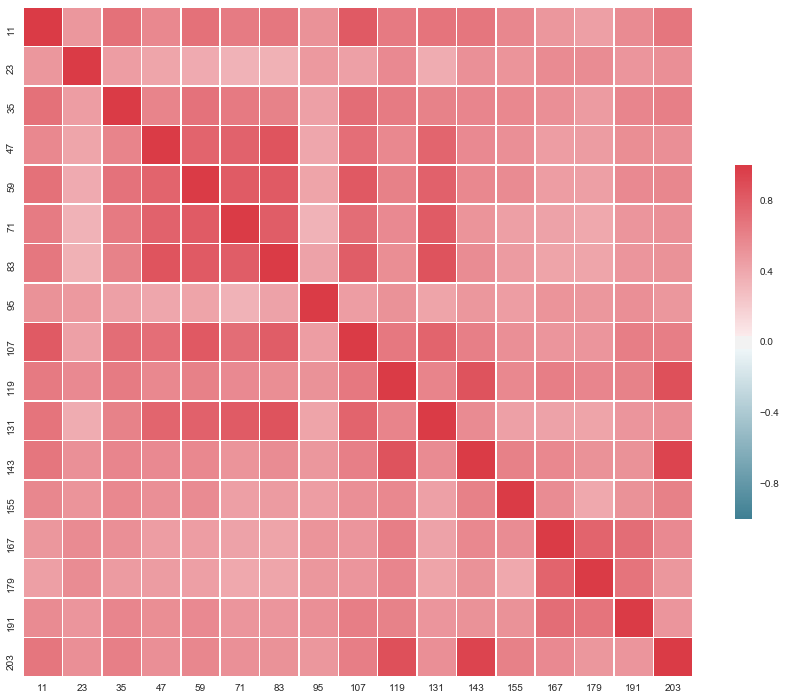

In [113]:
plt.show()

In [5]:
ensemble_voting;

<b> Making the ensemble Model <b>

In [21]:
from sklearn.metrics import accuracy_score

In [85]:
#check accuracy
#indx = [24,32,34,143,110,203]
indx = [11,23,35,47,59,]

indx = [i for i in range(11,205,12)]


for indx in indx:
    i = 0
    accs=[]
    for train_indexes, test_indexes in skf.split(X, Y):
        # print("TRAIN:", train_indexes, "TEST:", test_indexes)
        X_TRAIN, X_TEST = X[train_indexes], X[test_indexes]
        Y_TRAIN, Y_TEST = Y[train_indexes], Y[test_indexes]

        Y_PRED = ensemble_voting[indx][i]
        i += 1

        acc = accuracy_score(Y_TEST,Y_PRED)
        accs.append(acc)
        #print("Accuracy = ",acc)

    meanAcc = meanOfLists(accs)
    print("mean Accuracy = ",meanAcc)

mean Accuracy =  0.721304187017
mean Accuracy =  0.682078965228
mean Accuracy =  0.721811055307
mean Accuracy =  0.717112627953
mean Accuracy =  0.716861318058
mean Accuracy =  0.701519718737
mean Accuracy =  0.714708656174
mean Accuracy =  0.633110077124
mean Accuracy =  0.725937086815
mean Accuracy =  0.728215403647
mean Accuracy =  0.708191515714
mean Accuracy =  0.734889324875
mean Accuracy =  0.703315920349
mean Accuracy =  0.688851664083
mean Accuracy =  0.694982191035
mean Accuracy =  0.692764001594
mean Accuracy =  0.730201636099


C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [85]:
def ensembleVoting(Y_preds, selectedModels, nth_fold):
    
    ensemblePred = []
    
    for j in range(len(Y_preds[0][nth_fold])):
        # j will iterate from 0 to length of prediction array
        
        voting = {}    
        
        for i in selectedModels:
            #print(i,j,nth_fold)
            if (Y_preds[i][nth_fold][j] in voting):
                voting[Y_preds[i][nth_fold][j]] += 1
            else:
                voting[Y_preds[i][nth_fold][j]] = 1
        
        # finding max votes
        maxVotes = 0
        winningClass = 0
        
        for cls , votes in voting.items():
            if votes > maxVotes:
                maxVotes = votes
                winningClass = cls
        # print(maxVotes,winningClass)
        ensemblePred.append(winningClass)
        
    return ensemblePred
        

In [113]:











nth_fold = 0
accuracies = []

for train_indexes, test_indexes in skf.split(X, Y):
    # print("TRAIN:", train_indexes, "TEST:", test_indexes)
    X_TRAIN, X_TEST = X[train_indexes], X[test_indexes]
    Y_TRAIN, Y_TEST = Y[train_indexes], Y[test_indexes]
    
    #[24,143,32,34,203,110]
    Y_ensemble = ensembleVoting(ensemble_voting,[24,143,203],nth_fold)
    nth_fold += 1
    
    acc = accuracy_score(Y_TEST,Y_ensemble)
    accuracies.append(acc)
    # print("Accuracy = ",acc)


C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [114]:
print(accuracies)
meanAcc = meanOfLists(accuracies)
print("Mean Accuracy = ",meanAcc)

[0.74193548387096775, 0.68817204301075274, 0.74725274725274726, 0.7528089887640449, 0.73255813953488369]
Mean Accuracy =  0.732545480487


In [88]:
%store ensemble_voting

Stored 'ensemble_voting' (list)


# Feature Selection with Wrapper Approaches

In [78]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# This function implements the forward feature selection algorithm based on SVM

# 20 x 40 x 10 x 237 

def wrapper(X, y, n_selected_features, classifier):
    
    n_samples, n_features = X.shape    
        
    # using 10 fold cross validation
    kf = KFold(n_splits=10, shuffle=True)
    
    clf = classifier

    # selected feature set, initialized to be empty
    F = []
    count = 0
    while count < n_selected_features:
        max_acc = 0
        for i in range(n_features):
            if i not in F:
                F.append(i)
                X_tmp = X[:, F]
                acc = 0
                
                for train, test in kf.split(X_tmp):
                    clf.fit(X_tmp[train], y[train])
                    y_predict = clf.predict(X_tmp[test])
                    acc_tmp = accuracy_score(y[test], y_predict)
                    acc += acc_tmp
                acc = float(acc)/10
                F.pop()
                    
                # record the feature which results in the largest accuracy
                if acc > max_acc:
                    max_acc = acc
                    idx = i
        
        print(max_acc)
        F.append(idx)
        count += 1
    return np.array(F)            

In [79]:
filterFeatureSelectors[15]

[array([139, 145,  67, 131, 264, 132, 141,  69,  19, 143, 151, 204, 156,
        274, 157, 164,  83, 111, 240,  99, 148, 120, 113,  14, 229,   4,
        237,  16, 136, 112, 219, 227, 196, 166, 170, 250, 101, 276, 159,
         90, 180, 123, 210, 239, 247, 230,  92, 116,   6, 226, 266, 142,
        107, 152,   7, 199, 176, 189, 167,  32, 102,  68, 122,  64, 124,
        162, 206, 249,  20, 269, 207, 140,  75,  27, 197, 236, 212, 232,
        256, 125, 257,  87, 277,  51,  77,  41,  28, 179, 182,  93, 278,
        268, 242,  29, 158, 100, 258, 248, 220, 119,   8,  89, 198, 172,
        216, 191,  52, 241, 221, 134, 246, 259,  62,  88,   5, 108, 261,
        169, 178, 251, 231, 267,   2,  80,  39, 104, 168,  86,  56, 233,
        223, 186,  94, 271,  10, 187,  17, 201, 177,  44, 183,   0, 117,
        200, 128, 238,  95, 217,  13, 109], dtype=int64),
 array([139,  67,  83, 264, 131, 132, 141,  19, 143, 145, 151, 156, 157,
        274, 204, 164,  69, 111, 240, 237,  30, 148, 229,   4,  16

In [80]:
%%time
# Heavy Operation 
# wrapper_features = wrapper(X_TRAIN[:,filterFeatureSelectors[15]],Y_TRAIN,30,mlpcclassifier)

Wall time: 0 ns


In [81]:
wrapper_features = [33, 30, 27,  4, 22, 15,  8, 16, 32, 37, 29,  6, 34, 17, 23, 11,  2, 3,  7, 20, 12,  1,  5, 13,  9, 19, 24, 10, 38, 26]